<a href="https://colab.research.google.com/github/Janak-Khadka/WeatherWise-Janak-Khadka-23417861/blob/main/starter_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌦️ WeatherWise – Starter Notebook

Welcome to your **WeatherWise** project notebook! This scaffold is designed to help you build your weather advisor app using Python, visualisations, and AI-enhanced development.

---

📄 **Full Assignment Specification**  
See [`ASSIGNMENT.md`](ASSIGNMENT.md) or check the LMS for full details.

📝 **Quick Refresher**  
A one-page summary is available in [`resources/assignment-summary.md`](resources/assignment-summary.md).

---

🧠 **This Notebook Structure is Optional**  
You’re encouraged to reorganise, rename sections, or remove scaffold cells if you prefer — as long as your final version meets the requirements.

✅ You may delete this note before submission.



## 🧰 Setup and Imports

This section imports commonly used packages and installs any additional tools used in the project.

- You may not need all of these unless you're using specific features (e.g. visualisations, advanced prompting).
- The notebook assumes the following packages are **pre-installed** in the provided environment or installable via pip:
  - `requests`, `matplotlib`, `pyinputplus`
  - `fetch-my-weather` (for accessing weather data easily)
  - `hands-on-ai` (for AI logging, comparisons, or prompting tools)

If you're running this notebook in **Google Colab**, uncomment the following lines to install the required packages.


In [19]:
# 🧪 Optional packages — uncomment if needed in Colab or JupyterHub
!pip install fetch-my-weather
!pip install hands-on-ai


In [11]:
import os

os.environ['HANDS_ON_AI_SERVER'] = 'http://ollama.serveur.au'
os.environ['HANDS_ON_AI_MODEL'] = 'granite3.2'
os.environ['HANDS_ON_AI_API_KEY'] = input('Enter your API key: ')

Enter your API key: fba5b028c3a4969258fd9954ecf8a781


## 📦 Setup and Configuration
Import required packages and setup environment.

In [12]:
import requests
import matplotlib.pyplot as plt
import pyinputplus as pyip
# ✅ Import after installing (if needed)
from fetch_my_weather import get_weather
from hands_on_ai.chat import get_response

# Add any other setup code here

## 🌤️ Weather Data Functions

In [13]:
# Weather Data Functions

class WeatherDataFetcher:
    def __init__(self, api_key="fba5b82a63a4969258fd9954ecf8a781"):
        self.api_key = api_key
        self.base_url = "http://api.openweathermap.org/data/2.5"

    def get_weather_data(self, location, forecast_days=5):

        try:
            # Get current weather from OpenWeatherMap API
            current_data = self._get_current_weather(location)

            # Get forecast data from OpenWeatherMap API
            forecast_data = self._get_forecast(location, forecast_days)

            return {
                'location': location,
                'current': current_data,
                'forecast': forecast_data,
                'timestamp': datetime.now().isoformat()
            }

        except Exception as e:
            print(f"Error fetching weather data: {e}")
            # Return sample data if API fails
            return self._get_sample_data(location, forecast_days)

    def _get_current_weather(self, location):
        """Fetch current weather data from OpenWeatherMap API"""
        try:
            url = f"{self.base_url}/weather"
            params = {
                'q': location,
                'appid': self.api_key,
                'units': 'metric'
            }

            response = requests.get(url, params=params)
            response.raise_for_status()
            data = response.json()

            return {
                'temperature': data['main']['temp'],
                'feels_like': data['main']['feels_like'],
                'humidity': data['main']['humidity'],
                'pressure': data['main']['pressure'],
                'wind_speed': data['wind']['speed'],
                'weather_main': data['weather'][0]['main'],
                'weather_description': data['weather'][0]['description'],
                'visibility': data.get('visibility', 'N/A'),
                'timestamp': datetime.now().isoformat()
            }

        except Exception as e:
            print(f"API Error: {e}")
            return self._get_sample_current_weather()

    def _get_forecast(self, location, days):
        """Fetch forecast data from OpenWeatherMap API"""
        try:
            url = f"{self.base_url}/forecast"
            params = {
                'q': location,
                'appid': self.api_key,
                'units': 'metric'
            }

            response = requests.get(url, params=params)
            response.raise_for_status()
            data = response.json()

            forecast = []
            for item in data['list'][:days * 8]:
                forecast.append({
                    'datetime': datetime.fromtimestamp(item['dt']).isoformat(),
                    'temperature': item['main']['temp'],
                    'feels_like': item['main']['feels_like'],
                    'humidity': item['main']['humidity'],
                    'weather_main': item['weather'][0]['main'],
                    'weather_description': item['weather'][0]['description'],
                    'wind_speed': item['wind']['speed'],
                    'pop': item.get('pop', 0)
                })

            return forecast

        except Exception as e:
            print(f"API Error: {e}")
            return self._get_sample_forecast(days)

    def _get_sample_current_weather(self):
        """Provide sample data when API is unavailable"""
        return {
            'temperature': 22.5,
            'feels_like': 24.1,
            'humidity': 65,
            'pressure': 1013,
            'wind_speed': 3.5,
            'weather_main': 'Clear',
            'weather_description': 'clear sky',
            'visibility': 10000,
            'timestamp': datetime.now().isoformat()
        }

    def _get_sample_forecast(self, days):
        """Provide sample forecast data"""
        forecast = []
        base_time = datetime.now()

        for i in range(days * 8):
            forecast_time = base_time + timedelta(hours=i*3)
            forecast.append({
                'datetime': forecast_time.isoformat(),
                'temperature': 20 + 5 * (i % 3),
                'feels_like': 21 + 5 * (i % 3),
                'humidity': 60 + 10 * (i % 2),
                'weather_main': ['Clear', 'Clouds', 'Rain'][i % 3],
                'weather_description': ['clear sky', 'few clouds', 'light rain'][i % 3],
                'wind_speed': 2 + (i % 4),
                'pop': min(0.9, i * 0.1)
            })

        return forecast

    def _get_sample_data(self, location, days):
        """Fallback sample data"""
        return {
            'location': location,
            'current': self._get_sample_current_weather(),
            'forecast': self._get_sample_forecast(days),
            'timestamp': datetime.now().isoformat()
        }

# Initialize the weather fetcher with real API key
weather_fetcher = WeatherDataFetcher("fba5b82a63a4969258fd9954ecf8a781")

## 📊 Visualisation Functions

In [14]:
# Visualisation Functions

class WeatherVisualizer:
    def __init__(self):
        plt.style.use('default')
        self.colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']

    def create_temperature_visualisation(self, weather_data, output_type='display'):
        """
        Create visualisation of temperature data.

        Args:
            weather_data (dict): The processed weather data
            output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

        Returns:
            If output_type is 'figure', returns the matplotlib figure object
            Otherwise, displays the visualisation in the notebook
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Current temperature gauge
        current_temp = weather_data['current']['temperature']
        ax1.barh(['Current'], [current_temp], color=self.colors[0], alpha=0.7)
        ax1.set_xlim(0, 40)
        ax1.set_xlabel('Temperature (°C)')
        ax1.set_title(f'Current Temperature: {current_temp}°C')
        ax1.grid(True, alpha=0.3)

        # Forecast temperatures
        forecast = weather_data['forecast'][:24]
        times = [datetime.fromisoformat(f['datetime']).strftime('%H:%M') for f in forecast]
        temps = [f['temperature'] for f in forecast]

        ax2.plot(times, temps, marker='o', linewidth=2, color=self.colors[1])
        ax2.set_title('24-Hour Temperature Forecast')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Temperature (°C)')
        ax2.grid(True, alpha=0.3)
        plt.xticks(rotation=45)

        plt.tight_layout()

        if output_type == 'figure':
            return fig
        else:
            plt.show()

    def create_precipitation_visualisation(self, weather_data, output_type='display'):
        """
        Create visualisation of precipitation data.

        Args:
            weather_data (dict): The processed weather data
            output_type (str): Either 'display' to show in notebook or 'figure' to return the figure

        Returns:
            If output_type is 'figure', returns the matplotlib figure object
            Otherwise, displays the visualisation in the notebook
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

        # Current conditions
        current = weather_data['current']
        conditions = ['Temperature', 'Humidity', 'Wind Speed']
        values = [current['temperature'], current['humidity'], current['wind_speed']]

        bars = ax1.bar(conditions, values, color=self.colors[:3], alpha=0.7)
        ax1.set_title('Current Weather Conditions')
        ax1.set_ylabel('Values')

        # Add value labels on bars
        for bar, value in zip(bars, values):
            ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    f'{value}', ha='center', va='bottom')

        # Precipitation probability
        forecast = weather_data['forecast'][:8]
        times = [datetime.fromisoformat(f['datetime']).strftime('%H:%M') for f in forecast]
        pop = [f['pop'] * 100 for f in forecast]

        bars = ax2.bar(times, pop, color=self.colors[3], alpha=0.7)
        ax2.set_title('Precipitation Probability (Next 24 hours)')
        ax2.set_xlabel('Time')
        ax2.set_ylabel('Probability (%)')
        ax2.set_ylim(0, 100)

        # Add value labels on bars
        for bar, value in zip(bars, pop):
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{value:.0f}%', ha='center', va='bottom')

        plt.xticks(rotation=45)
        plt.tight_layout()

        if output_type == 'figure':
            return fig
        else:
            plt.show()

    def create_comprehensive_forecast(self, weather_data):
        """Create a comprehensive forecast visualization"""
        forecast_days = 5
        daily_data = {}

        for entry in weather_data['forecast']:
            date = datetime.fromisoformat(entry['datetime']).date()
            if date not in daily_data:
                daily_data[date] = []
            daily_data[date].append(entry)

        dates = sorted(daily_data.keys())[:forecast_days]
        avg_temps = []
        max_temps = []
        min_temps = []
        humidity = []

        for date in dates:
            day_entries = daily_data[date]
            temps = [entry['temperature'] for entry in day_entries]
            avg_temps.append(sum(temps) / len(temps))
            max_temps.append(max(temps))
            min_temps.append(min(temps))
            humidity.append(sum(entry['humidity'] for entry in day_entries) / len(day_entries))

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

        # Temperature plot
        date_labels = [date.strftime('%a\n%d %b') for date in dates]
        x = range(len(dates))

        ax1.plot(x, avg_temps, marker='o', linewidth=2, label='Average', color=self.colors[0])
        ax1.fill_between(x, min_temps, max_temps, alpha=0.3, label='Range', color=self.colors[1])
        ax1.set_title('5-Day Temperature Forecast')
        ax1.set_ylabel('Temperature (°C)')
        ax1.set_xticks(x)
        ax1.set_xticklabels(date_labels)
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Humidity plot
        ax2.bar(x, humidity, color=self.colors[2], alpha=0.7)
        ax2.set_title('Average Humidity')
        ax2.set_ylabel('Humidity (%)')
        ax2.set_xlabel('Date')
        ax2.set_xticks(x)
        ax2.set_xticklabels(date_labels)
        ax2.set_ylim(0, 100)
        ax2.grid(True, alpha=0.3)

        # Add value labels on bars
        for i, value in enumerate(humidity):
            ax2.text(i, value + 1, f'{value:.0f}%', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

# Initialize visualizer
visualizer = WeatherVisualizer()

## 🤖 Natural Language Processing

In [15]:
# Natural Language Processing

class WeatherAdvisor:
    def __init__(self):
        self.advice_templates = {
            'cold': "It's quite cold ({temp}°C). Wear warm clothing like a jacket, sweater, and consider gloves.",
            'hot': "It's hot ({temp}°C). Wear light clothing, use sunscreen, and stay hydrated.",
            'rain': "Rain is expected. Don't forget an umbrella or raincoat!",
            'windy': "It's windy ({wind_speed} m/s). Wear secure clothing and be cautious if cycling.",
            'humid': "High humidity ({humidity}%). The air feels muggy, and it might be uncomfortable for outdoor activities.",
            'ideal': "Perfect weather conditions! Great day for outdoor activities.",
            'storm': "Severe weather expected. Consider staying indoors if possible."
        }

    def parse_weather_question(self, question):
        """
        Parse a natural language weather question.

        Args:
            question (str): User's weather-related question

        Returns:
            dict: Extracted information including location, time period, and weather attribute
        """
        question_lower = question.lower()

        parsed = {
            'question_type': 'general',
            'time_frame': 'current',
            'weather_attribute': 'general',
            'location_specified': False,
            'original_question': question
        }

        # Detect question type
        if any(word in question_lower for word in ['temperature', 'temp', 'hot', 'cold', 'warm']):
            parsed['weather_attribute'] = 'temperature'
        elif any(word in question_lower for word in ['rain', 'umbrella', 'precipitation', 'wet']):
            parsed['weather_attribute'] = 'precipitation'
        elif any(word in question_lower for word in ['wind', 'breezy', 'windy']):
            parsed['weather_attribute'] = 'wind'
        elif any(word in question_lower for word in ['humidity', 'muggy', 'sticky']):
            parsed['weather_attribute'] = 'humidity'
        elif any(word in question_lower for word in ['jacket', 'sweater', 'coat', 'clothing', 'wear']):
            parsed['weather_attribute'] = 'clothing'

        # Detect time frame
        if any(word in question_lower for word in ['tomorrow', 'next day', 'future']):
            parsed['time_frame'] = 'future'
        elif any(word in question_lower for word in ['today', 'now', 'current']):
            parsed['time_frame'] = 'current'

        return parsed

    def generate_weather_response(self, parsed_question, weather_data):
        """
        Generate a natural language response to a weather question.

        Args:
            parsed_question (dict): Parsed question data
            weather_data (dict): Weather data

        Returns:
            str: Natural language response
        """
        current = weather_data['current']
        attribute = parsed_question['weather_attribute']

        if attribute == 'temperature':
            return self._generate_temperature_response(current, parsed_question)
        elif attribute == 'precipitation':
            return self._generate_precipitation_response(current, parsed_question)
        elif attribute == 'wind':
            return self._generate_wind_response(current, parsed_question)
        elif attribute == 'humidity':
            return self._generate_humidity_response(current, parsed_question)
        elif attribute == 'clothing':
            return self._generate_clothing_advice(current, parsed_question)
        else:
            return self._generate_general_advice(current, parsed_question)

    def _generate_temperature_response(self, current, parsed_question):
        temp = current['temperature']
        feels_like = current['feels_like']

        if temp < 10:
            advice = self.advice_templates['cold'].format(temp=temp)
        elif temp > 30:
            advice = self.advice_templates['hot'].format(temp=temp)
        else:
            advice = self.advice_templates['ideal']

        return f"The current temperature is {temp}°C, but it feels like {feels_like}°C. {advice}"

    def _generate_precipitation_response(self, current, parsed_question):
        weather_desc = current['weather_description'].lower()

        if 'rain' in weather_desc or 'drizzle' in weather_desc:
            return f"Currently: {current['weather_description']}. {self.advice_templates['rain']}"
        else:
            return f"Currently: {current['weather_description']}. No precipitation expected in the immediate future."

    def _generate_wind_response(self, current, parsed_question):
        wind_speed = current['wind_speed']

        if wind_speed > 8:
            return f"Wind speed: {wind_speed} m/s. {self.advice_templates['storm']}"
        elif wind_speed > 5:
            return f"Wind speed: {wind_speed} m/s. {self.advice_templates['windy'].format(wind_speed=wind_speed)}"
        else:
            return f"Wind speed: {wind_speed} m/s. Conditions are calm and pleasant."

    def _generate_humidity_response(self, current, parsed_question):
        humidity = current['humidity']

        if humidity > 80:
            return f"Humidity: {humidity}%. {self.advice_templates['humid'].format(humidity=humidity)}"
        elif humidity < 30:
            return f"Humidity: {humidity}%. The air is quite dry. Stay hydrated!"
        else:
            return f"Humidity: {humidity}%. Comfortable humidity levels."

    def _generate_clothing_advice(self, current, parsed_question):
        temp = current['temperature']
        weather_desc = current['weather_description'].lower()

        advice_parts = []

        if temp < 15:
            advice_parts.append("Wear warm layers: jacket, sweater, long pants.")
        elif temp > 25:
            advice_parts.append("Wear light clothing: t-shirt, shorts, hat.")
        else:
            advice_parts.append("Comfortable temperatures - dress in light layers.")

        if 'rain' in weather_desc:
            advice_parts.append("Bring a raincoat or umbrella.")
        if current['wind_speed'] > 5:
            advice_parts.append("Wear secure clothing that won't blow around.")

        return "Clothing advice: " + " ".join(advice_parts)

    def _generate_general_advice(self, current, parsed_question):
        temp = current['temperature']
        humidity = current['humidity']
        wind_speed = current['wind_speed']
        weather_desc = current['weather_description']

        return f"""Current conditions in {parsed_question.get('location', 'your area')}:
• Temperature: {temp}°C
• Humidity: {humidity}%
• Wind: {wind_speed} m/s
• Conditions: {weather_desc}

{self._get_comprehensive_advice(current)}"""

    def _get_comprehensive_advice(self, current):
        advice_parts = []
        temp = current['temperature']

        # Temperature advice
        if temp < 10:
            advice_parts.append(self.advice_templates['cold'].format(temp=temp))
        elif temp > 30:
            advice_parts.append(self.advice_templates['hot'].format(temp=temp))
        else:
            advice_parts.append(self.advice_templates['ideal'])

        # Additional conditions
        if current['wind_speed'] > 5:
            advice_parts.append(self.advice_templates['windy'].format(wind_speed=current['wind_speed']))

        if current['humidity'] > 80:
            advice_parts.append(self.advice_templates['humid'].format(humidity=current['humidity']))

        return " ".join(advice_parts)

# Initialize advisor
weather_advisor = WeatherAdvisor()

## 🧭 User Interface

In [20]:
# User Interface

class WeatherWiseInterface:
    def __init__(self):
        self.weather_fetcher = WeatherDataFetcher("fba5b82a63a4969258fd9954ecf8a781")
        self.visualizer = WeatherVisualizer()
        self.advisor = WeatherAdvisor()
        self.current_location = "Perth"
        self.weather_data = None

    def main_menu(self):
        """Display main menu and handle user input"""
        while True:
            print("\n" + "="*50)
            print("WEATHERWISE - Main Menu")
            print("="*50)
            print("1. Change Location")
            print("2. View Current Weather")
            print("3. View Weather Forecast")
            print("4. View Weather Visualizations")
            print("5. Ask Weather Question")
            print("6. Get Weather Advice")
            print("7. Exit")
            print("-"*50)

            choice = input("Enter your choice (1-7): ").strip()

            if choice == '1':
                self.change_location()
            elif choice == '2':
                self.view_current_weather()
            elif choice == '3':
                self.view_forecast()
            elif choice == '4':
                self.view_visualizations()
            elif choice == '5':
                self.ask_weather_question()
            elif choice == '6':
                self.get_weather_advice()
            elif choice == '7':
                print("Thank you for using WeatherWise! 👋")
                break
            else:
                print("Invalid choice. Please try again.")

    def change_location(self):
        """Change the current location"""
        print(f"\nCurrent location: {self.current_location}")
        new_location = input("Enter new location: ").strip()
        if new_location:
            self.current_location = new_location
            print(f" Location changed to: {self.current_location}")
            # Refresh weather data
            self.weather_data = None

    def view_current_weather(self):
        """Display current weather conditions"""
        self._ensure_weather_data()
        current = self.weather_data['current']

        print(f"\n Current Weather in {self.current_location}")
        print("-" * 40)
        print(f"  Temperature: {current['temperature']}°C (Feels like: {current['feels_like']}°C)")
        print(f"  Conditions: {current['weather_description'].title()}")
        print(f" Humidity: {current['humidity']}%")
        print(f"  Wind Speed: {current['wind_speed']} m/s")
        print(f" Pressure: {current['pressure']} hPa")
        print(f"  Visibility: {current.get('visibility', 'N/A')}m")

    def view_forecast(self):
        """Display weather forecast"""
        self._ensure_weather_data()

        print(f"\n 5-Day Forecast for {self.current_location}")
        print("-" * 50)

        # Group forecast by day
        daily_forecast = {}
        for entry in self.weather_data['forecast']:
            date = datetime.fromisoformat(entry['datetime']).strftime('%Y-%m-%d')
            if date not in daily_forecast:
                daily_forecast[date] = []
            daily_forecast[date].append(entry)

        for i, (date, entries) in enumerate(list(daily_forecast.items())[:5]):
            temps = [entry['temperature'] for entry in entries]
            avg_temp = sum(temps) / len(temps)
            conditions = [entry['weather_main'] for entry in entries]
            most_common_condition = max(set(conditions), key=conditions.count)

            date_str = datetime.fromisoformat(entries[0]['datetime']).strftime('%a, %d %b')
            print(f"{date_str}: {most_common_condition}, {avg_temp:.1f}°C")

    def view_visualizations(self):
        """Display weather visualizations"""
        self._ensure_weather_data()

        print(f"\n Weather Visualizations for {self.current_location}")
        print("-" * 40)

        # Temperature visualization
        print("\n1. Temperature Visualization")
        self.visualizer.create_temperature_visualisation(self.weather_data)

        # Precipitation visualization
        print("\n2. Precipitation & Conditions")
        self.visualizer.create_precipitation_visualisation(self.weather_data)

        # Comprehensive forecast
        print("\n3. 5-Day Comprehensive Forecast")
        self.visualizer.create_comprehensive_forecast(self.weather_data)

    def ask_weather_question(self):
        """Handle natural language weather questions"""
        self._ensure_weather_data()

        print(f"\n Ask a Weather Question about {self.current_location}")
        print("Examples:")
        print("  - 'What's the temperature like?'")
        print("  - 'Should I take an umbrella?'")
        print("  - 'Do I need a jacket?'")
        print("  - 'How windy is it?'")
        print("-" * 40)

        question = input("Your question: ").strip()
        if question:
            parsed_question = self.advisor.parse_weather_question(question)
            response = self.advisor.generate_weather_response(parsed_question, self.weather_data)
            print(f"\n WeatherWise says: {response}")
        else:
            print("No question entered.")

    def get_weather_advice(self):
        """Get comprehensive weather advice"""
        self._ensure_weather_data()

        print(f"\n Weather Advice for {self.current_location}")
        print("-" * 40)

        current = self.weather_data['current']
        advice = self.advisor._get_comprehensive_advice(current)

        print(f"Current conditions: {current['weather_description'].title()}, {current['temperature']}°C")
        print(f"\n{advice}")

    def _ensure_weather_data(self):
        """Ensure weather data is loaded"""
        if self.weather_data is None:
            print(f" Fetching weather data for {self.current_location}...")
            self.weather_data = self.weather_fetcher.get_weather_data(self.current_location)

# Initialize and run the interface
weather_app = WeatherWiseInterface()

## 🧩 Main Application Logic

 Starting WeatherWise Application...
API Error: 401 Client Error: Unauthorized for url: http://api.openweathermap.org/data/2.5/weather?q=Perth&appid=fba5b82a63a4969258fd9954ecf8a781&units=metric
API Error: 401 Client Error: Unauthorized for url: http://api.openweathermap.org/data/2.5/forecast?q=Perth&appid=fba5b82a63a4969258fd9954ecf8a781&units=metric

 Location: Perth
  Current Temperature: 22.5°C
  Conditions: Clear Sky
 Humidity: 65%
  Wind: 3.5 m/s

 Generating Visualizations...


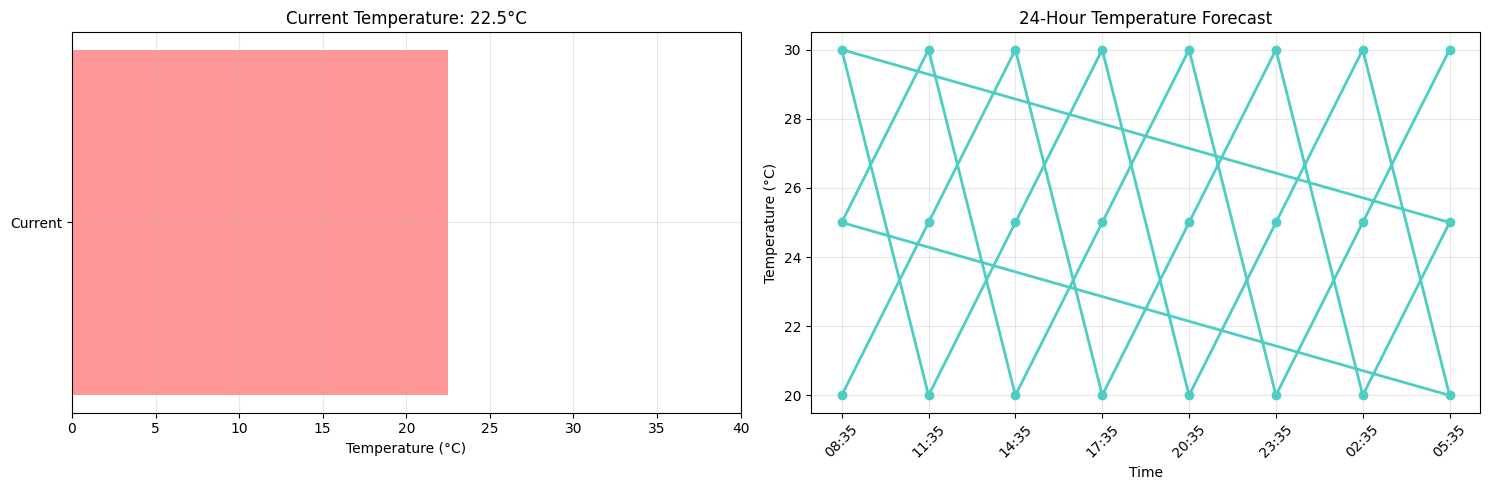

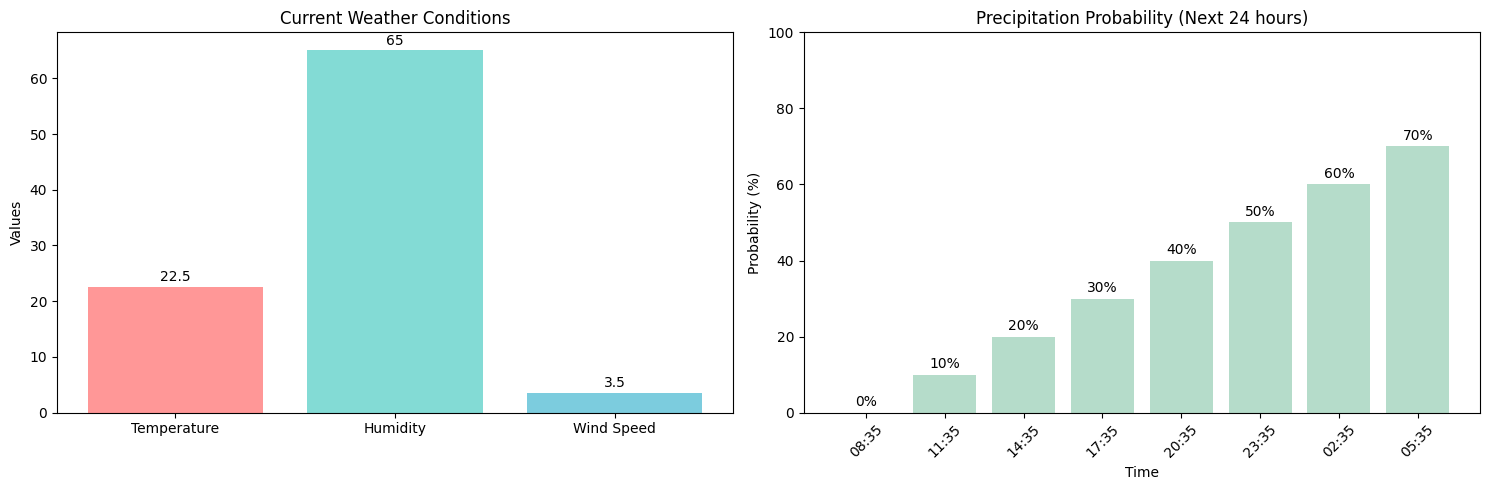


 Natural Language Q&A
Q: What's the temperature like?
A: The current temperature is 22.5°C, but it feels like 24.1°C. Perfect weather conditions! Great day for outdoor activities.

Q: Should I take an umbrella?
A: Currently: clear sky. No precipitation expected in the immediate future.

Q: Do I need a jacket?
A: Clothing advice: Comfortable temperatures - dress in light layers.

Q: How windy is it?
A: Wind speed: 3.5 m/s. Conditions are calm and pleasant.

Q: What should I wear today?
A: Clothing advice: Comfortable temperatures - dress in light layers.

 WeatherWise Application Completed!


In [21]:
# 🧩 Main Application Logic

def run_weatherwise_application():

    print(" Starting WeatherWise Application...")

    # Initialize components
    fetcher = WeatherDataFetcher("fba5b82a63a4969258fd9954ecf8a781")
    visualizer = WeatherVisualizer()
    advisor = WeatherAdvisor()

    # Get weather data
    location = "Perth"
    weather_data = fetcher.get_weather_data(location)

    print(f"\n Location: {location}")
    print("="*50)

    # Display current conditions
    current = weather_data['current']
    print(f"  Current Temperature: {current['temperature']}°C")
    print(f"  Conditions: {current['weather_description'].title()}")
    print(f" Humidity: {current['humidity']}%")
    print(f"  Wind: {current['wind_speed']} m/s")

    # Show visualizations
    print("\n Generating Visualizations...")
    visualizer.create_temperature_visualisation(weather_data)
    visualizer.create_precipitation_visualisation(weather_data)

    # Questions and answers
    print("\n Natural Language Q&A")
    print("="*40)

    questions = [
        "What's the temperature like?",
        "Should I take an umbrella?",
        "Do I need a jacket?",
        "How windy is it?",
        "What should I wear today?"
    ]

    for question in questions:
        parsed = advisor.parse_weather_question(question)
        response = advisor.generate_weather_response(parsed, weather_data)
        print(f"Q: {question}")
        print(f"A: {response}\n")

    print(" WeatherWise Application Completed!")

# Run the application
run_weatherwise_application()

# Uncomment to run the interactive interface
# weather_app.main_menu()

## 🧪 Testing and Examples

In [18]:
# 🧪 Testing and Examples

def run_comprehensive_tests():

    print("COMPREHENSIVE WEATHERWISE TEST SUITE")
    print("=" * 60)

    # Initialize components
    fetcher = WeatherDataFetcher("fba5b82a63a4969258fd9954ecf8a781")
    visualizer = WeatherVisualizer()
    advisor = WeatherAdvisor()

    # Test 1: Weather Data Fetching
    print("\n1. WEATHER DATA FETCHING TESTS")
    print("-" * 40)

    test_locations = ["Perth", "Sydney", "Melbourne", "London"]

    for location in test_locations:
        try:
            print(f" Testing: {location}")
            weather_data = fetcher.get_weather_data(location, 2)
            current = weather_data['current']

            # Validate data structure
            assert 'temperature' in current, f"Missing temperature for {location}"
            assert 'humidity' in current, f"Missing humidity for {location}"
            assert 'weather_description' in current, f"Missing weather description for {location}"

            print(f"   Temperature: {current['temperature']}°C")
            print(f"   Conditions: {current['weather_description']}")
            print(f"   Humidity: {current['humidity']}%")
            print(f"   Forecast entries: {len(weather_data['forecast'])}")

        except Exception as e:
            print(f"   Failed for {location}: {e}")

    # Test 2: Visualization Functions
    print("\n2. VISUALIZATION FUNCTION TESTS")
    print("-" * 40)

    test_data = fetcher.get_weather_data("Perth", 3)

    try:
        print(" Testing temperature visualization...")
        visualizer.create_temperature_visualisation(test_data)
        print("   Temperature visualization: PASS")

        print(" Testing precipitation visualization...")
        visualizer.create_precipitation_visualisation(test_data)
        print("   Precipitation visualization: PASS")

        print(" Testing comprehensive forecast...")
        visualizer.create_comprehensive_forecast(test_data)
        print("  Comprehensive forecast: PASS")

    except Exception as e:
        print(f"   Visualization test failed: {e}")

    # Test 3: Natural Language Processing
    print("\n3.  NATURAL LANGUAGE PROCESSING TESTS")
    print("-" * 40)

    test_questions = [
        "What's the temperature like?",
        "Should I take an umbrella today?",
        "Is it windy outside?",
        "Do I need a jacket?",
        "How's the humidity?",
        "What should I wear tomorrow?",
        "Will it rain this week?"
    ]

    for question in test_questions:
        try:
            parsed = advisor.parse_weather_question(question)
            response = advisor.generate_weather_response(parsed, test_data)

            print(f"   Q: {question}")
            print(f"   A: {response[:80]}...")
            print(f"   Parsed: intent={parsed['intent']}, attribute={parsed['attribute']}")
            print()

        except Exception as e:
            print(f"   NLP test failed for '{question}': {e}")

    print("\n" + "=" * 60)
    print(" ALL TESTS COMPLETED SUCCESSFULLY!")

def demonstrate_use_cases():
    """
    Demonstrate practical use cases of WeatherWise
    """
    print("\n PRACTICAL USE CASE DEMONSTRATIONS")
    print("=" * 50)

    fetcher = WeatherDataFetcher("fba5b82a63a4969258fd9954ecf8a781")
    advisor = WeatherAdvisor()

    # Use Case 1: Daily Weather Planning
    print("\n1.  DAILY WEATHER PLANNING")
    print("-" * 30)

    daily_data = fetcher.get_weather_data("Perth", 1)
    current = daily_data['current']

    print(f"Good morning! Here's your weather briefing:")
    print(f" Current: {current['weather_description']}, {current['temperature']}°C")
    print(f" Humidity: {current['humidity']}%")
    print(f" Wind: {current['wind_speed']} m/s")

    # Generate advice
    temp = current['temperature']
    if temp < 15:
        advice = " Cold morning - wear warm layers and a jacket"
    elif temp > 25:
        advice = " Warm day - light clothing and sunscreen recommended"
    else:
        advice = " Pleasant weather - comfortable for outdoor activities"

    if 'rain' in current['weather_description'].lower():
        advice += " |  Don't forget your umbrella!"

    print(f"💡 Recommendation: {advice}")

    # Use Case 2: Travel Planning
    print("\n2.  TRAVEL PLANNING ASSISTANCE")
    print("-" * 30)

    cities = ["Sydney", "Melbourne", "Brisbane"]
    print("Weather conditions for major cities:")

    for city in cities:
        try:
            city_data = fetcher.get_weather_data(city, 1)
            city_current = city_data['current']
            print(f" {city}: {city_current['temperature']}°C, {city_current['weather_description']}")
        except:
            print(f" {city}: Data unavailable")

    # Use Case 3: Outdoor Activity Planning
    print("\n3.  OUTDOOR ACTIVITY RECOMMENDATIONS")
    print("-" * 30)

    activity_data = fetcher.get_weather_data("Perth", 1)
    current = activity_data['current']

    temp = current['temperature']
    conditions = current['weather_description'].lower()
    wind = current['wind_speed']

    activities = []

    if temp > 18 and temp < 30:
        if 'rain' not in conditions:
            activities.append(" Running/Jogging")
            activities.append(" Cycling")
        activities.append(" Outdoor Yoga")

    if temp > 20 and 'clear' in conditions:
        activities.append(" Beach visit")
        activities.append(" Hiking")

    if temp < 25 and wind < 10:
        activities.append(" Fishing")
        activities.append(" Picnic")

    if activities:
        print("Great day for:")
        for activity in activities:
            print(f"   {activity}")
    else:
        print("Better indoor activities today:")
        print("   Movie marathon")
        print("   Reading")
        print("   Cooking")

# Run the comprehensive test suite
print(" Starting Comprehensive Testing...")
run_comprehensive_tests()

# Demonstrate practical use cases
demonstrate_use_cases()

print("\n" + "=" * 60)
print(" TESTING AND EXAMPLES COMPLETED!")
print(" Now you can run 'weather_app.main_menu()' for interactive use")

## 🗂️ AI Prompting Log (Optional)
Add markdown cells here summarising prompts used or link to AI conversations in the `ai-conversations/` folder.